### Importaciones

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, Function, dsolve, exp, sin

### Definicion de la funcion

Nuestra funcion por defecto es $f(t,x) = x$  
( Más adelante veremos que podemos cambiar la función si se requiere)

In [ ]:
def funcion_f(ecuacion:str="x"):
    function = sp.sympify(ecuacion)
    return function

*Digite el numero de iteraciones deseadas:*

In [ ]:
numero_iteraciones = 5

*Digite el valor inicial en t:*

In [ ]:
paso_inicial_T = 0

*Digite el valor final en t:*

In [ ]:
paso_final_T = 10

*Digite la condicion inicial de $x(t)$:*

In [ ]:
paso_inicial_X = 1

*A continuación calcularemos el $\Delta t$*

In [ ]:
delta_T = (paso_final_T - paso_inicial_T)/numero_iteraciones

### Iniciemos con la solucion exacta

In [ ]:
# Definir la variable independiente
t = symbols('t')

# Esta es una funcion que depende de t
x = Function('x')(t)

funcion_m = x
# Definir la ecuación diferencial (Homogenea)
edo = x.diff(t) - funcion_m
# Resolver la ecuación diferencial y darle su valor inicial

solucion = dsolve(edo, x, ics={x.subs(t, paso_inicial_T): paso_inicial_X})
solucion

Eq(x(t), exp(t))

In [ ]:
# Creamos una lista con un solo elemento de nuestro valore inicial de t
vector_T_funcion_real = np.array([paso_inicial_T])

# Iteramos para crear el vector para realizar la graficación de la funcion exacta
for iteracion in range(numero_iteraciones*1000):
    t_i = (vector_T_funcion_real[iteracion] + delta_T/ 1000)
    vector_T_funcion_real = np.append(vector_T_funcion_real, t_i)

# Evaluamos la función en cada valor de tiempo y almacenamos los resultados en una lista
vector_f_solucion = [solucion.rhs.subs({t: valor}) for valor in list(vector_T_funcion_real)]

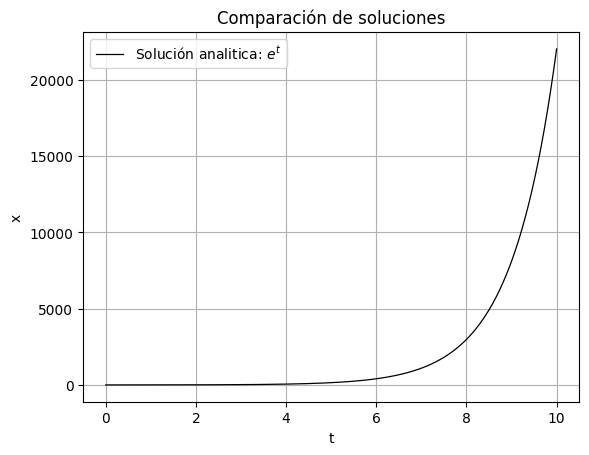

In [ ]:
plt.plot(vector_T_funcion_real, vector_f_solucion, 'k-', label=f"Solución analitica: $e^t$ ", linewidth=0.9, markersize=12, )
plt.xlabel('t')
plt.ylabel('x')
plt.title('Comparación de soluciones')
plt.grid(True)
plt.legend()
plt.show()

### Definición de las variables simbolicas

In [ ]:
t, x = sp.symbols('t x')

### Si requerimos cambiar la funcion, aqui la definimos:

In [ ]:
fun = "(2*t*(1+x**2))"

Creamos la funcion programatica $f$  
Como parametro tenemos la funcion que creamos, si no le pasamos este parametro usa nuestra funcion por defecto

In [ ]:
func_f = funcion_f()
func_f

x

## Metodo de Euler

$x_{k+1} = x_{k} + f(t_{k},x_{k})\Delta t$

In [ ]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_euler = np.array([paso_inicial_T])
vector_X_euler = np.array([paso_inicial_X])

# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones):
    dic_evaluar = {
        t: vector_T_euler[iteracion],
        x: vector_X_euler[iteracion]
    }
    t_i = vector_T_euler[iteracion] + delta_T
    x_i = vector_X_euler[iteracion] + func_f.subs(dic_evaluar) * delta_T

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_T_euler = np.append(vector_T_euler, t_i)
    vector_X_euler = np.append(vector_X_euler, x_i)

### Si requiere ver los vectores resultantes basta expandir y correr las siguientes celdas

In [ ]:
vector_T_euler

array([ 0.,  2.,  4.,  6.,  8., 10.])

In [ ]:
vector_X_euler

array([1, 3.00000000000000, 9.00000000000000, 27.0000000000000,
       81.0000000000000, 243.000000000000], dtype=object)

### Grafiquemos

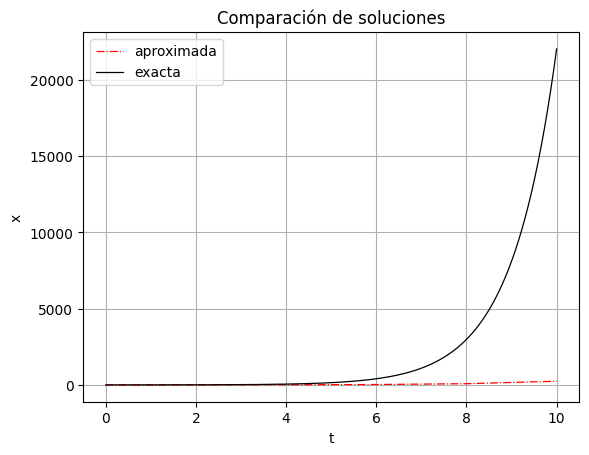

In [ ]:
plt.plot(vector_T_euler, vector_X_euler, 'r-.', label='aproximada', linewidth=0.9, markersize=12)
plt.plot(vector_T_funcion_real, vector_f_solucion, 'k-', label="exacta", linewidth=0.9, markersize=12)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Comparación de soluciones')
plt.grid(True)
plt.legend()
plt.show()

## Metodo de Euler mejorado

$x_{k+1} = x_{k} + (\frac{m_{k} + n_{k}}{2})\Delta t $

Como podemos notar el metodo de euler mejorado requiere que se definan tanto $m_{k}$ como $n_{k}$ entonces empecemos definiendolas:

$m_{k} = f(t_{k},x_{k})$

$n_{k} = f(t_{k+1},y_{k})$  
donde  
$y_{k} = x_{k} + f(t_{k+1},y_{k}) \Delta t$

In [ ]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_em = np.array([paso_inicial_T])
vector_X_em = np.array([paso_inicial_X])

for iteracion in range(numero_iteraciones):
    dic_eval_em_m = {
        t: vector_T_em[iteracion],
        x: vector_X_em[iteracion]
    }
    em_mi = func_f.subs(dic_eval_em_m)

    t_i = vector_T_em[iteracion] + delta_T
    vector_T_em = np.append(vector_T_em, t_i)

    dic_eval_em_n = {
        t: vector_T_em[iteracion + 1],
        x: vector_X_em[iteracion] + em_mi * delta_T
    }
    em_ni = func_f.subs(dic_eval_em_n)

    x_i = vector_X_em[iteracion] + (delta_T/2) * (em_mi + em_ni )

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_X_em = np.append(vector_X_em, x_i)


### Grafiquemos

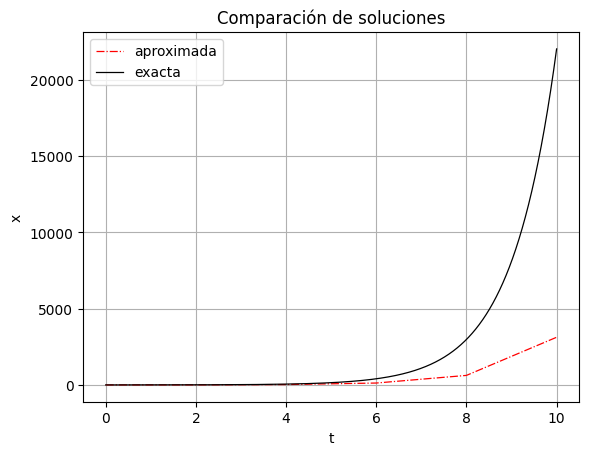

In [ ]:
plt.plot(vector_T_em, vector_X_em, 'r-.', label='aproximada', linewidth=0.9, markersize=12)
plt.plot(vector_T_funcion_real, vector_f_solucion, 'k-', label="exacta", linewidth=0.9, markersize=12)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Comparación de soluciones')
plt.grid(True)
plt.legend()
plt.show()

## Metodo de Runge-Kutta (Euler de cuarto orden)

$x_{k+1} = x_{k} + (\frac{m_{k} + 2n_{k} + 2p_{k} + q_{k}}{6})\Delta t $

Definamos $m_{k} , n_{k} , p_{k} , q_{k}$

$m_{k} = f(t_{k},k_{k})$

$n_{k} = f(t_{k} + \frac{\Delta t}{2}, y_{k} )$ donde $y_{k} = x_{k} + m_{k} \frac{\Delta t}{2}$

$p_{k} = f(t_{k} + \frac{\Delta t}{2}, z_{k} )$ donde $z_{k} = x_{k} + n_{k}\frac{\Delta t}{2}$

$q_{k} = f(t_{k+1}, w_{k})$ donde $w_{k} = x_{k} + p_{k}\Delta t$

In [ ]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_rk = np.array([paso_inicial_T])
vector_X_rk = np.array([paso_inicial_X])

# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones):
    dic_eval_rk_m = {
        t: vector_T_rk[iteracion],
        x: vector_X_rk[iteracion]
    }
    m_i = func_f.subs(dic_eval_rk_m)

    dic_eval_rk_n = {
        t: vector_T_rk[iteracion] + (delta_T/2),
        x: vector_X_rk[iteracion] + m_i * (delta_T/2)
    }
    n_i = func_f.subs(dic_eval_rk_n)

    dic_eval_rk_p = {
        t: vector_T_rk[iteracion] + (delta_T/2),
        x: vector_X_rk[iteracion] + n_i * (delta_T/2)
    }
    p_i = func_f.subs(dic_eval_rk_p)

    t_i = vector_T_rk[iteracion] + delta_T
    vector_T_rk = np.append(vector_T_rk, t_i)

    dic_eval_rk_q = {
        t: vector_T_rk[iteracion + 1] + (delta_T/2),
        x: vector_X_rk[iteracion] + p_i * (delta_T)
    }
    q_i = func_f.subs(dic_eval_rk_q)

    x_i = vector_X_rk[iteracion] + (delta_T/6) * (m_i + 2 * n_i + 2 * p_i + q_i)

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_X_rk = np.append(vector_X_rk, x_i)

In [ ]:
vector_T_rk

array([ 0.,  2.,  4.,  6.,  8., 10.])

In [ ]:
vector_X_rk

array([1, 7.00000000000000, 49.0000000000000, 343.000000000000,
       2401.00000000000, 16807.0000000000], dtype=object)

### Grafiquemos

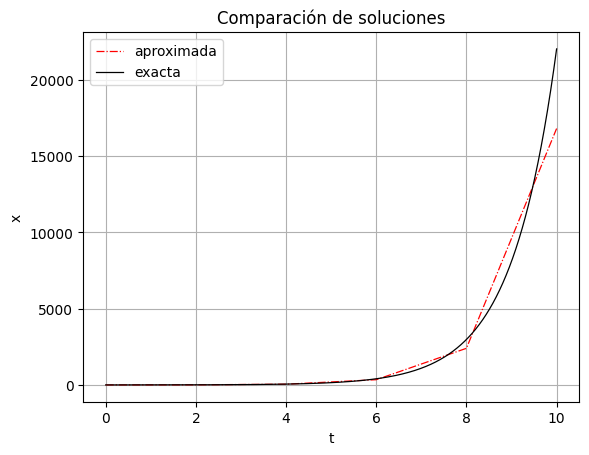

In [ ]:
plt.plot(vector_T_rk, vector_X_rk, 'r-.', label='aproximada', linewidth=0.9, markersize=12)
plt.plot(vector_T_funcion_real, vector_f_solucion, 'k-', label="exacta", linewidth=0.9, markersize=12)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Comparación de soluciones')
plt.grid(True)
plt.legend()
plt.show()

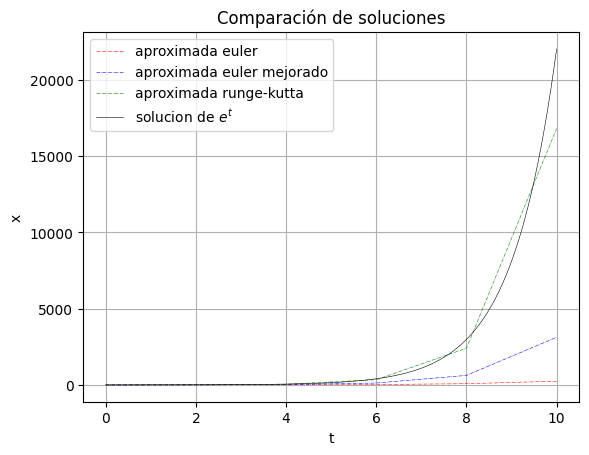

In [ ]:
plt.plot(vector_T_euler, vector_X_euler, 'r-.', label='aproximada euler', linewidth=0.4, markersize=12)
plt.plot(vector_T_em, vector_X_em, 'b-.', label='aproximada euler mejorado', linewidth=0.4, markersize=12)
plt.plot(vector_T_rk, vector_X_rk, 'g-.', label='aproximada runge-kutta', linewidth=0.4, markersize=12)
plt.plot(vector_T_funcion_real, vector_f_solucion, 'k-', label="solucion de $e^t$", linewidth=0.4, markersize=12)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Comparación de soluciones')
plt.grid(True)
plt.legend()
plt.show()